# Week 1 - Project 1 - Customer Signup Behaviour & Data Qaulity Audit

** Name : ** Bhoomi Sharma
** Date : ** 09/2025
** Course : ** Business Intelligent Project


### Objective

This Project analyses customer sign-up data to idetifying data inaccurate, User behaviour for each plan, and Marketing opt-in behaviour & demographics.

In [1]:
## ---- setup libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## load datasets
df = pd.read_csv("customer_signups.csv")
print("data shape:", df.shape)
print(df.head())

data shape: (300, 10)
  customer_id             name                 email signup_date     source  \
0   CUST00000    Joshua Bryant                   NaN         NaN  Instagram   
1   CUST00001   Nicole Stewart   nicole1@example.com  02/01/2024   LinkedIn   
2   CUST00002     Rachel Allen   rachel2@example.com  03/01/2024     Google   
3   CUST00003  Zachary Sanchez  zachary3@mailhub.org  04/01/2024    YouTube   
4   CUST00004              NaN  matthew4@mailhub.org  05/01/2024   LinkedIn   

  region plan_selected marketing_opt_in age      gender  
0    NaN         basic               No  34      Female  
1   West         basic              Yes  29        Male  
2  North       PREMIUM              Yes  34  Non-Binary  
3    NaN           Pro               No  40        Male  
4   West       Premium               No  25       Other  


In [3]:
df.shape

(300, 10)

In [4]:
## data exploration 
df.columns

Index(['customer_id', 'name', 'email', 'signup_date', 'source', 'region',
       'plan_selected', 'marketing_opt_in', 'age', 'gender'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  291 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


In [6]:
df.describe(include='all')

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
count,298,291,266,298,291,270,292,291,288,292
unique,298,291,265,295,7,5,8,4,11,7
top,CUST00000,Joshua Bryant,lisa11@mailhub.org,not a date,YouTube,North,Premium,No,40,Other
freq,1,1,2,4,58,65,57,156,50,59


In [7]:
df.isna().sum()

customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in     9
age                 12
gender               8
dtype: int64

In [8]:
## % count missing values
missing_table = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_percent": (df.isna().sum() / len(df) * 100).round(2)
})

print(missing_table)

                  missing_count  missing_percent
customer_id                   2             0.67
name                          9             3.00
email                        34            11.33
signup_date                   2             0.67
source                        9             3.00
region                       30            10.00
plan_selected                 8             2.67
marketing_opt_in              9             3.00
age                          12             4.00
gender                        8             2.67


In [9]:
## Cleaning the data 1. convert datetime 
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
weekly = (
    df.dropna(subset=["signup_date"])
      .groupby(df["signup_date"].dt.to_period("W"))
      .size()
      .rename("signups")
      .reset_index()
      .rename(columns={"signup_date": "week"})
)
print(weekly.head())
print(df["signup_date"].dtype)

                    week  signups
0  2024-01-01/2024-01-07        6
1  2024-01-08/2024-01-14        5
2  2024-01-15/2024-01-21        7
3  2024-01-22/2024-01-28        7
4  2024-01-29/2024-02-04        8
datetime64[ns]


C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\616057384.py:2: UserWarning: Parsing '13/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\616057384.py:2: UserWarning: Parsing '14/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\616057384.py:2: UserWarning: Parsing '15/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\616057384.py:2: UserWarning: Parsing '16/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consi

In [10]:
##2. standardize text values for plan
plan_map = {"basic":"Basic", "BASIC":"Basic", "pro":"Pro", "PRO":"Pro", "premium":"Premium", "PREMIUM":"Premium"}
df["plan_selected"] = df["plan_selected"].str.strip().str.title()
df["plan_selected"] = df["plan_selected"].replace(plan_map)

In [11]:
##For Gender
gender_map = {"m":"Male", "male":"Male", "MALE": "Male",
    "f": "Female", "female": "Female", "FEMALE": "Female",
    "other": "Other", "O": "Other"}
df["gender"] = df["gender"].str.strip().str.title()
df["gender"] = df["gender"].replace(gender_map)

In [12]:
### Mapping value 
value_map =  {"plan_selected": plan_map, 
            "gender": gender_map
          }
print("Value map used for crrections:")
print(value_map)

Value map used for crrections:
{'plan_selected': {'basic': 'Basic', 'BASIC': 'Basic', 'pro': 'Pro', 'PRO': 'Pro', 'premium': 'Premium', 'PREMIUM': 'Premium'}, 'gender': {'m': 'Male', 'male': 'Male', 'MALE': 'Male', 'f': 'Female', 'female': 'Female', 'FEMALE': 'Female', 'other': 'Other', 'O': 'Other'}}


In [13]:
# Marketing opt-in to Yes/No (else Unknown)
if 'marketing_opt_in' in df.columns:
    tmp = (df['marketing_opt_in'].str.lower()
           .replace({'y':'yes','n':'no','true':'yes','false':'no','1':'yes','0':'no'}))
    tmp = tmp.str.title()
    df['marketing_opt_in_clean'] = tmp.where(tmp.isin(['Yes','No']), other=pd.NA).fillna('Unknown')
    print(df[['marketing_opt_in', 'marketing_opt_in_clean']].head(20))

   marketing_opt_in marketing_opt_in_clean
0                No                     No
1               Yes                    Yes
2               Yes                    Yes
3                No                     No
4                No                     No
5                No                     No
6               Yes                    Yes
7               Yes                    Yes
8               Yes                    Yes
9                No                     No
10               No                     No
11              Yes                    Yes
12               No                     No
13               No                     No
14               No                     No
15              Yes                    Yes
16               No                     No
17               No                     No
18              Yes                    Yes
19              Yes                    Yes


In [14]:
### clean source & region
for col in ['source','region']:
    if col in df.columns:
        df[col + '_clean'] = df[col].str.title()

display(df.head())

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,marketing_opt_in_clean,source_clean,region_clean
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,Basic,No,34,Female,No,Instagram,NaN
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,LinkedIn,West,Basic,Yes,29,Male,Yes,Linkedin,West
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34,Non-Binary,Yes,Google,North
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,YouTube,NaN,Pro,No,40,Male,No,Youtube,NaN
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,LinkedIn,West,Premium,No,25,Other,No,Linkedin,West


In [15]:
## Remove Duplicates row by customer_id
before = df.shape[0]
df = df.drop_duplicates(subset="customer_id")
after = df.shape[0]

n_dups = before - after   # number of duplicates removed
print(f"Removed {n_dups} duplicate rows")

Removed 1 duplicate rows


In [16]:
## Handle missing values on email, age, gender, marketing, plan
df['email_valid'] = df['email'].str.contains(r'^[^@\s]+@[^@\s]+\.[^@\s]+$',regex=True, na=False)
print("Invalid or missing emails (kept but flagged):", int((~df['email_valid']).sum()))


display(df.head(10))

Invalid or missing emails (kept but flagged): 36


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,marketing_opt_in_clean,source_clean,region_clean,email_valid
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,Basic,No,34,Female,No,Instagram,NaN,False
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,LinkedIn,West,Basic,Yes,29,Male,Yes,Linkedin,West,True
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34,Non-Binary,Yes,Google,North,True
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,YouTube,NaN,Pro,No,40,Male,No,Youtube,NaN,True
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,LinkedIn,West,Premium,No,25,Other,No,Linkedin,West,True
5,CUST00005,John Gonzales,john5@mailhub.org,2024-06-01,Facebook,South,Premium,No,34,Other,No,Facebook,South,True
6,CUST00006,Crystal Mason,crystal6@mailhub.org,2024-07-01,YouTube,North,Unknownplan,Yes,40,Male,Yes,Youtube,North,True
7,CUST00007,Michael Bailey,michael7@mailhub.org,2024-08-01,YouTube,Central,Pro,Yes,60,Other,Yes,Youtube,Central,True
8,CUST00008,Bianca Morris,bianca8@example.com,2024-09-01,Referral,West,Pro,Yes,25,Male,Yes,Referral,West,True
9,CUST00009,Cindy Anderson,NaN,2024-10-01,Google,East,Premium,No,29,Female,No,Google,East,False


In [17]:
# Region
if 'region_clean' in df.columns:
    df['region_was_missing'] = df['region_clean'].isna() | (df['region_clean'].str.len()==0)
    df['region_clean'] = df['region_clean'].fillna('Unknown').replace('', 'Unknown')
# Age
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['age_was_missing'] = df['age'].isna()
    median_age = df['age'].median(skipna=True)
    df['age_filled'] = df['age'].fillna(median_age)

# Gender
if 'gender_clean' in df.columns:
    df['gender_was_missing'] = df['gender_clean'].isna() | (df['gender_clean'].str.len()==0)
    df['gender_clean'] = df['gender_clean'].fillna('Unknown').replace('', 'Unknown')

# Marketing
if 'marketing_opt_in_clean' in df.columns:
    df['moptin_was_missing'] = df['marketing_opt_in_clean'].isna()
    df['marketing_opt_in_clean'] = df['marketing_opt_in_clean'].fillna('Unknown')

# Plan
if 'plan_selected_clean' in df.columns:
    df['plan_was_missing'] = df['plan_selected_clean'].isna() | (df['plan_selected_clean'].str.len()==0)
    df['plan_selected_clean'] = df['plan_selected_clean'].fillna('Unknown').replace('', 'Unknown')

display(df.head())

,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender,marketing_opt_in_clean,source_clean,region_clean,email_valid,region_was_missing,age_was_missing,age_filled,moptin_was_missing
0,CUST00000,Joshua Bryant,NaN,NaT,Instagram,NaN,Basic,No,34.0,Female,No,Instagram,Unknown,False,True,False,34.0,False
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,LinkedIn,West,Basic,Yes,29.0,Male,Yes,Linkedin,West,True,False,False,29.0,False
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34.0,Non-Binary,Yes,Google,North,True,False,False,34.0,False
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,YouTube,NaN,Pro,No,40.0,Male,No,Youtube,Unknown,True,True,False,40.0,False
4,CUST00004,NaN,matthew4@mailhub.org,2024-05-01,LinkedIn,West,Premium,No,25.0,Other,No,Linkedin,West,True,False,False,25.0,False


In [18]:
## Data Qaulity summary
def line(label=""):
    print("\n" + "-"*30 + f" {label}" + "-"*30 + "\n")
line("Missing counts")
missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts)

line("Missing %")
missing_pct = (df.isna().mean() * 100).round(2).sort_values(ascending=False)
display(missing_pct)

line("duplicates removed")
print(n_dups)
               
line("Inconsistent categories corrected")
print("- plan_selected: mapped 'PRO'/'pro'→'Pro', 'basic'→'Basic', 'premium'→'Premium'")
print("- gender: mapped 'm'/'male'→'Male', 'f'/'female'→'Female', others→'Other'/'Unknown'")
print("- marketing_opt_in: normalised to 'Yes'/'No' (else 'Unknown')")               


------------------------------ Missing counts------------------------------



email                     34
region                    30
age                       19
source_clean               9
source                     9
marketing_opt_in           9
name                       9
gender                     8
plan_selected              8
signup_date                6
customer_id                1
marketing_opt_in_clean     0
region_clean               0
email_valid                0
region_was_missing         0
age_was_missing            0
age_filled                 0
moptin_was_missing         0
dtype: int64


------------------------------ Missing %------------------------------



email                     11.37
region                    10.03
age                        6.35
source_clean               3.01
source                     3.01
marketing_opt_in           3.01
name                       3.01
gender                     2.68
plan_selected              2.68
signup_date                2.01
customer_id                0.33
marketing_opt_in_clean     0.00
region_clean               0.00
email_valid                0.00
region_was_missing         0.00
age_was_missing            0.00
age_filled                 0.00
moptin_was_missing         0.00
dtype: float64


------------------------------ duplicates removed------------------------------

1

------------------------------ Inconsistent categories corrected------------------------------

- plan_selected: mapped 'PRO'/'pro'→'Pro', 'basic'→'Basic', 'premium'→'Premium'
- gender: mapped 'm'/'male'→'Male', 'f'/'female'→'Female', others→'Other'/'Unknown'
- marketing_opt_in: normalised to 'Yes'/'No' (else 'Unknown')


In [19]:
## summary outputs (GROUPBY/ value_counts)
##1. signup per week

if 'signup_date' in df.columns:
    weekly = (
        df.set_index('signup_date')
          .assign(_ones=1)
          .resample('W')['_ones'].sum()
          .rename('signups')
          .reset_index()
    )
    display(weekly.head())
    weekly.to_csv("output_signups_per_week.csv", index=False)
else:
    print("signup_date missing")

,signup_date,signups
0,2024-01-07,6
1,2024-01-14,5
2,2024-01-21,7
3,2024-01-28,7
4,2024-02-04,8


In [20]:
## 2 signup by source, region, and plan

signups_by_source = df['source'].value_counts(dropna=False).reset_index()
signups_by_source.columns = ['source', 'signups']
print("\nSign-ups by source:")
print(signups_by_source.head())


signups_by_region = df['region'].value_counts(dropna=False).reset_index()
signups_by_region.columns = ['region', 'signups']
print("\nSign-ups by region:")
print(signups_by_region.head())

signups_by_plan = df['plan_selected'].value_counts(dropna=False).reset_index()
signups_by_plan.columns = ['plan_selected', 'signups']
print("\nSign-ups by plan:")
print(signups_by_plan.head())



Sign-ups by source:
      source  signups
0    YouTube       58
1     Google       50
2   Referral       49
3  Instagram       48
4   Facebook       40

Sign-ups by region:
    region  signups
0    North       65
1     East       61
2    South       59
3     West       45
4  Central       39

Sign-ups by plan:
  plan_selected  signups
0       Premium       99
1           Pro       94
2         Basic       92
3           NaN        8
4   Unknownplan        6


In [21]:
df['plan_selected'] = df['plan_selected'].astype(str).str.strip().str.title()

# Define valid plans
valid_plans = ['Basic', 'Pro', 'Premium']

# Replace invalid entries with "Unknown"
df['plan_selected'] = df['plan_selected'].apply(lambda x: x if x in valid_plans else "Unknown")


signups_by_plan = df['plan_selected'].value_counts(dropna=False).reset_index()
signups_by_plan.columns = ['plan_selected', 'signups']
print(signups_by_plan)

  plan_selected  signups
0       Premium       99
1           Pro       94
2         Basic       92
3       Unknown       14


In [22]:
# Clean gender values
df['gender'] = df['gender'].str.strip().str.title()  # Standardise casing
valid_genders = ['Male', 'Female', 'Other']

df['gender'] = df['gender'].apply(lambda x: x if x in valid_genders else "Unknown")

# Clean marketing_opt_in values
df['marketing_opt_in'] = df['marketing_opt_in'].str.strip().str.title()
valid_optin = ['Yes', 'No']

df['marketing_opt_in'] = df['marketing_opt_in'].apply(lambda x: x if x in valid_optin else "Unknown")

### 3  Marketing opt-in counts by gender
optin_by_gender = df.groupby(['gender', 'marketing_opt_in']).size().reset_index(name='count')
print("\nMarketing opt-in by gender:")
print(optin_by_gender.head())


Marketing opt-in by gender:
   gender marketing_opt_in  count
0  Female               No     47
1  Female          Unknown      1
2  Female              Yes     44
3    Male               No     50
4    Male          Unknown      4


In [23]:
### 4 Age Summary
print("\nAge Summary:")
print("Min age:", df['age'].min())
print("Max age:", df['age'].max())
print("Mean age:", df['age'].mean())
print("Median age:", df['age'].median())
print("Null age count:", df['age'].isnull().sum())



Age Summary:
Min age: 21.0
Max age: 206.0
Mean age: 36.175
Median age: 34.0
Null age count: 19


In [24]:
### 5 Save outputs to CSV

weekly.to_csv("output_signups_per_week.csv", index=False)
signups_by_source.to_csv("output_signups_by_source.csv", index=False)
signups_by_region.to_csv("output_signups_by_region.csv", index=False)
signups_by_plan.to_csv("output_signups_by_plan.csv", index=False)
optin_by_gender.to_csv("output_optin_by_gender.csv", index=False)

print("\n Analysis complete. CSV outputs saved.")


 Analysis complete. CSV outputs saved.


In [25]:
# 1: Load support_tickets.csv
support = pd.read_csv("support_tickets.csv")

In [26]:
## Convert ticket_date to datetime
support['ticket_date'] = pd.to_datetime(support['ticket_date'], errors='coerce')


C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\2188620896.py:2: UserWarning: Parsing '17/08/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  support['ticket_date'] = pd.to_datetime(support['ticket_date'], errors='coerce')
C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\2188620896.py:2: UserWarning: Parsing '22/07/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  support['ticket_date'] = pd.to_datetime(support['ticket_date'], errors='coerce')
C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\2188620896.py:2: UserWarning: Parsing '26/09/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  support['ticket_date'] = pd.to_datetime(support['ticket_date'], errors='coerce')
C:\Users\bhoom\AppData\Local\Temp\ipykernel_15272\2188620896.py:2: UserWarning: Parsing '21/10/2024' in DD/MM/YYYY format. Provide format or specify in

In [27]:
# Drop rows without a valid customer_id
support = support.dropna(subset=['customer_id'])


In [28]:
# 2: Merge with signups
merged = pd.merge(df, support, on="customer_id", how="left")


In [29]:
 # 3: Count how many customers contacted support within 2 weeks of sign-up
merged['ticket_date'] = pd.to_datetime(merged['ticket_date'], errors='coerce')
merged['within_2_weeks'] = (merged['ticket_date'] - merged['signup_date']).dt.days <= 14
print("\nCustomers contacting support within 2 weeks:\n", merged['within_2_weeks'].value_counts())



Customers contacting support within 2 weeks:
 False    301
True      61
Name: within_2_weeks, dtype: int64


In [30]:
# 4: Summarise support activity by plan and region
support_summary = merged.groupby(['plan_selected', 'region'])['ticket_id'].count()
print("\nSupport activity by plan and region:\n", support_summary)



Support activity by plan and region:
 plan_selected  region 
Basic          Central     2
               East       11
               North       3
               South      14
               West       10
Premium        Central     6
               East        1
               North       6
               South       2
               West       11
Pro            Central    10
               East       14
               North      11
               South       3
               West        6
Unknown        East        2
               North       6
               South       0
               West        0
Name: ticket_id, dtype: int64


In [31]:
### Task 4.1 Which acquisition source brought in the most users last month?

max_date = df['signup_date'].dropna().max()
last_full_month = (max_date.to_period('M') - 1).to_timestamp()
month_start = last_full_month
month_end   = (last_full_month + pd.offsets.MonthEnd(1))

mask_last_month = (df['signup_date'] >= month_start) & (df['signup_date'] <= month_end)
df_last_month = df.loc[mask_last_month]

if df_last_month.empty:
    print("No sign-ups in the last full month of your dataset. Try overall top source instead:")
    print(df['source_clean'].value_counts().head(5))
else:
    top_sources = df_last_month['source_clean'].value_counts()
    print(f"Period considered: {month_start.date()} to {month_end.date()}")
    print("Top sources last month:")
    print(top_sources.head(5))
    print(f"\nAnswer: {top_sources.index[0]} had the most users last month.")

Period considered: 2024-11-01 to 2024-11-30
Top sources last month:
Google       3
Instagram    2
Referral     1
Facebook     1
Linkedin     1
Name: source_clean, dtype: int64

Answer: Google had the most users last month.


In [32]:
### 4.2 Which region shows signs of missing/incomplete data?

key_cols = ['email','age','gender','plan_selected_clean','marketing_opt_in_clean']
present_cols = [c for c in key_cols if c in df.columns]

def row_has_missing(row):
    return any(pd.isna(row[c]) or str(row[c]).strip()=='' for c in present_cols)

df['has_missing_any_key'] = df.apply(row_has_missing, axis=1)

region_missing = (
    df.groupby('region_clean')['has_missing_any_key']
      .mean()
      .sort_values(ascending=False)
      .rename('missing_rate')
      .mul(100).round(1)
)
print(region_missing)

if not region_missing.empty:
    worst_region = region_missing.idxmax()
    rate = region_missing.max()
    print(f"\nAnswer: '{worst_region}' shows the most incomplete data (~{rate}%). "
          "Recommend fixing capture rules for this region (e.g., email/age required).")

region_clean
East       21.3
Central    20.5
Unknown    20.0
North      16.9
West       15.6
South      10.2
Name: missing_rate, dtype: float64

Answer: 'East' shows the most incomplete data (~21.3%). Recommend fixing capture rules for this region (e.g., email/age required).


In [33]:
## 4.3 Are older users more or less likely to opt in to marketing?

# Clean age to numeric
if 'age' in df.columns:
    df['age_num'] = pd.to_numeric(df['age'], errors='coerce')
else:
    df['age_num'] = np.nan

bins = [0, 24, 34, 44, 54, 64, 120]
labels = ['<=24','25-34','35-44','45-54','55-64','65+']
df['age_band'] = pd.cut(df['age_num'], bins=bins, labels=labels, right=True, include_lowest=True)

optin_rate_by_band = (
    df.assign(opt_in=lambda x: (x['marketing_opt_in_clean']=='Yes').astype(int))
      .groupby('age_band')['opt_in'].mean()
      .mul(100).round(1)
)
print("Opt-in rate (%) by age band:")
print(optin_rate_by_band)

# Simple interpretation comparing youngest vs oldest bands that exist
valid_bands = optin_rate_by_band.dropna()
if not valid_bands.empty:
    youngest = valid_bands.index[0]
    oldest   = valid_bands.index[-1]
    diff = valid_bands.loc[oldest] - valid_bands.loc[youngest]
    tendency = "more" if diff > 0 else "less"
    print(f"\nAnswer: Older users are {tendency} likely to opt in (difference: {diff:.1f} pp).")

Opt-in rate (%) by age band:
age_band
<=24     35.7
25-34    42.8
35-44    48.0
45-54    46.9
55-64    42.9
65+       NaN
Name: opt_in, dtype: float64

Answer: Older users are more likely to opt in (difference: 7.2 pp).


In [35]:
print(df.columns.tolist())

['customer_id', 'name', 'email', 'signup_date', 'source', 'region', 'plan_selected', 'marketing_opt_in', 'age', 'gender', 'marketing_opt_in_clean', 'source_clean', 'region_clean', 'email_valid', 'region_was_missing', 'age_was_missing', 'age_filled', 'moptin_was_missing', 'has_missing_any_key', 'age_num', 'age_band']


In [36]:
## If the original column is called 'plan_selected', clean it

if 'plan_selected' in df.columns:
    df['plan_selected_clean'] = (
        df['plan_selected'].astype(str).str.strip().str.title()
        .replace({'Pro ':'Pro','Premium ':'Premium','Basic ':'Basic','':np.nan})
    )
## If it's already called something else (like 'plan'), adjust the name here:

elif 'plan' in df.columns:
    df['plan_selected_clean'] = (
        df['plan'].astype(str).str.strip().str.title()
        .replace({'Pro ':'Pro','Premium ':'Premium','Basic ':'Basic','':np.nan})
    )
else:
    print("⚠️ No column named 'plan_selected' or 'plan' found. Check your df.columns output.")

In [37]:
plan_counts = df['plan_selected_clean'].value_counts()
print("Overall plan popularity:")
print(plan_counts)

if not plan_counts.empty:
    top_plan = plan_counts.idxmax()
    cross = (
        df[df['plan_selected_clean']==top_plan]
          .groupby('age_band')['customer_id']
          .count()
          .sort_values(ascending=False)
    )
    print(f"\nTop plan: {top_plan}")
    print("Age groups for top plan:")
    print(cross)

Overall plan popularity:
Premium    99
Pro        94
Basic      92
Unknown    14
Name: plan_selected_clean, dtype: int64

Top plan: Premium
Age groups for top plan:
age_band
25-34    47
35-44    23
45-54    15
<=24      6
55-64     4
65+       0
Name: customer_id, dtype: int64


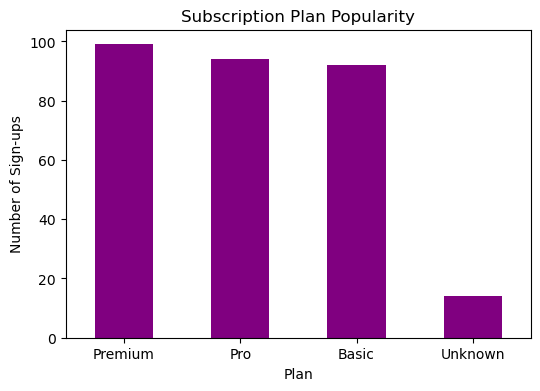

In [42]:
# Count sign-ups by plan
plan_counts = df['plan_selected_clean'].value_counts()

# Plot
plan_counts.plot(kind='bar', figsize=(6,4), color="purple")
plt.title("Subscription Plan Popularity")
plt.xlabel("Plan")
plt.ylabel("Number of Sign-ups")
plt.xticks(rotation=0)
plt.show()

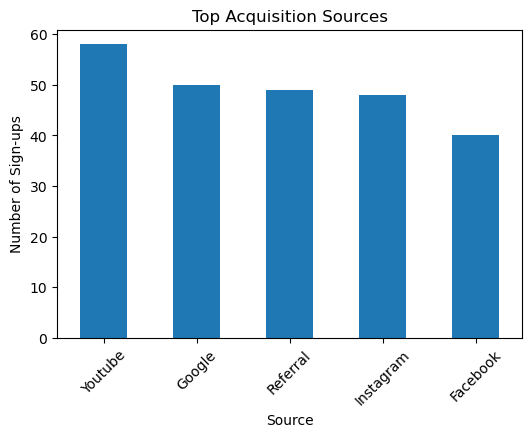

In [39]:
# Count sign-ups by source
source_counts = df['source_clean'].value_counts().head(5)  # top 5 sources

# Plot
source_counts.plot(kind='bar', figsize=(6,4))
plt.title("Top Acquisition Sources")
plt.xlabel("Source")
plt.ylabel("Number of Sign-ups")
plt.xticks(rotation=45)
plt.show()

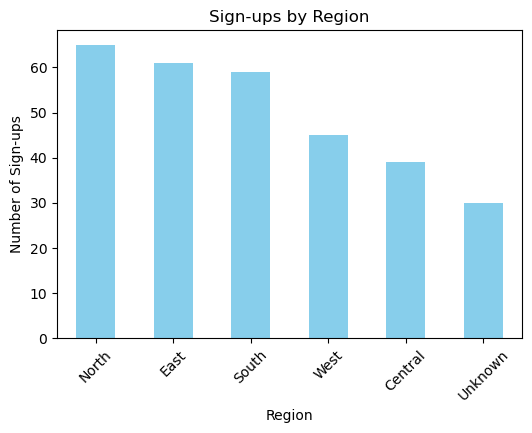

In [40]:
# Count sign-ups by region
region_counts = df['region_clean'].value_counts()

# Plot
region_counts.plot(kind='bar', figsize=(6,4), color="skyblue")
plt.title("Sign-ups by Region")
plt.xlabel("Region")
plt.ylabel("Number of Sign-ups")
plt.xticks(rotation=45)
plt.show()